# 🏥 Epileptic Seizure Recognition

Epilepsy is a neurological disorder characterized by a predisposition to the onset of epileptic (or comitial) seizures. It is one of the most frequent neurological diseases, with a prevalence of about 1 percent (500,000 patients) in Italy.

The electroencephalogram makes it possible to investigate brain function, record electrical activity, and highlight certain abnormalities, called epileptiforms, which, however, cannot always be classified as epileptic during visualization.

For this reason, Machine Learning can positively help the classification of electrical activities: starting from the analysis of different electrical activities that have already been classified in the past, ML offers the possibility of unearthing epileptogenic fragments, even those that by pure human analysis in the past have not been classified as abnormal.

## 🚿 Data import and cleaning

In [24]:
import pandas as pd

# Loading
data = pd.read_csv('Dataset/data.csv')

# Removing first column (not useful)
data.drop('Unnamed', axis=1, inplace=True)

## 👀 Data Observation

### y diffences

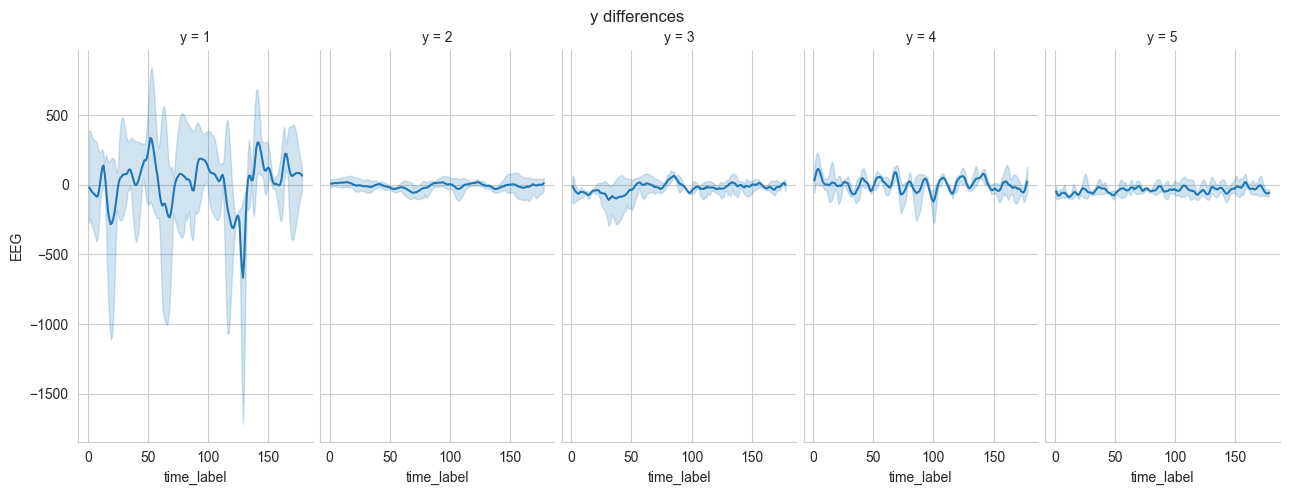

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
    
n = 3
data_y_1 = data[data['y'] == 1][:n]
data_y_2 = data[data['y'] == 2][:n]
data_y_3 = data[data['y'] == 3][:n]
data_y_4 = data[data['y'] == 4][:n]
data_y_5 = data[data['y'] == 5][:n]
samples_to_show = pd.concat([data_y_1, data_y_2, data_y_3, data_y_4, data_y_5], axis=0, ignore_index=True)

# Creating a dataframe with one row for each value of X
df_splitted_seizure_short = (samples_to_show
                .melt(id_vars=['y'], var_name='time_label', value_name='EEG', ignore_index=False)
                .reset_index()
                .rename(columns={'index': 'id'})
            )

# Getting time_index column from time_label
df_splitted_seizure_short['time_label'] = (df_splitted_seizure_short['time_label'].str.translate(str.maketrans('', '', 'X')).astype(int))

# Creating and showing the graph
g = sns.relplot(
    data=df_splitted_seizure_short,
    kind='line',
    x='time_label',
    y='EEG',
    col='y'
)
g.fig.subplots_adjust(top=.9, left=.07)
g.fig.suptitle("y differences")
g.fig.set_size_inches(13, 5)
plt.legend([], [], frameon=False)
plt.show()

### y numbers

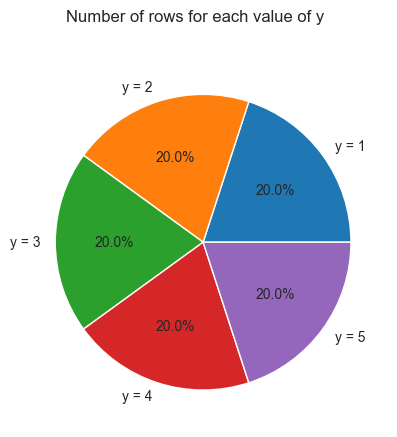

In [26]:
# Checking the number of rows for each value of y
data_y_1 = data[data['y'] == 1]
data_y_2 = data[data['y'] == 2]
data_y_3 = data[data['y'] == 3]
data_y_4 = data[data['y'] == 4]
data_y_5 = data[data['y'] == 5]


labels = 'y = 1', 'y = 2', 'y = 3', 'y = 4', 'y = 5'
sizes = [len(data_y_1.index), len(data_y_2.index), len(data_y_3.index), len(data_y_4.index), len(data_y_5.index)]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
fig.suptitle("Number of rows for each value of y")
plt.show()

## 📉 Exploratory Data Analysis: examples

### Heatmap

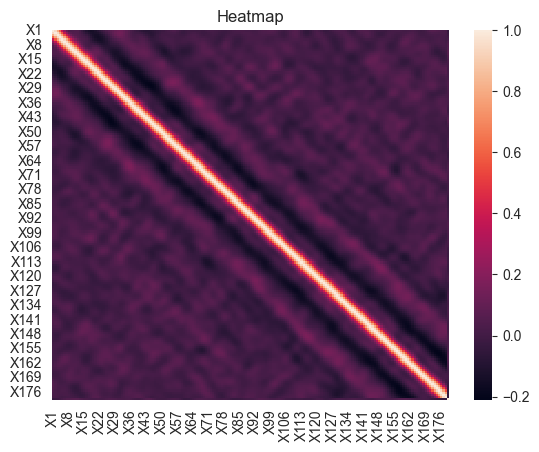

In [27]:
import seaborn as sns
import numpy as np

data['y'] = np.where(data['y'] == 1, 1, 0)
sns.heatmap(data.corr())
plt.title("Heatmap")
plt.show()

### Box plot

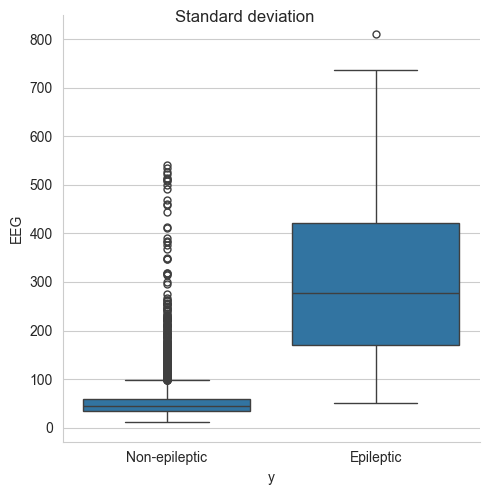

In [28]:
data['y'] = np.where(data['y'] == 1, 'Epileptic', 'Non-epileptic')
df_splitted_seizure = (data
                .melt(id_vars=['y'], var_name='time_label', value_name='EEG', ignore_index=False)
                .reset_index()
                .rename(columns={'index': 'id'})
            )
df_splitted_seizure['time_label'] = (df_splitted_seizure['time_label'].str.translate(str.maketrans('', '', 'X')).astype(int))
sns.catplot(
    data=df_splitted_seizure.groupby(["id", "y"]).std().reset_index(),
    kind='box',
    x='y',
    y='EEG',
).fig.suptitle("Standard deviation")
plt.show()

### Kernel Density Estimate

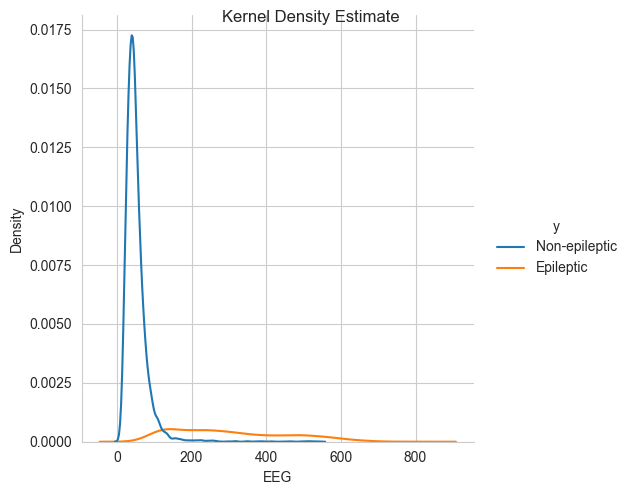

In [29]:
sns.displot(
    data=df_splitted_seizure.groupby(["id", "y"]).std().reset_index(),
    kind='kde',
    x='EEG',
    hue='y'
).fig.suptitle("Kernel Density Estimate")
plt.show()

### EEG Altitude

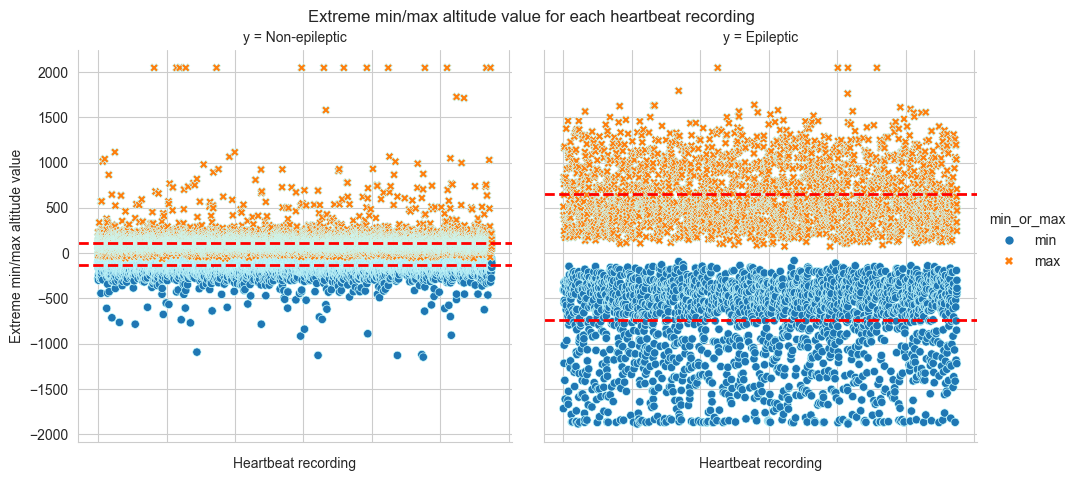

In [30]:
altitude = data.iloc[:, 0:177]

altitude['min'] = data.min(axis=1, numeric_only=True)
altitude['max'] = data.max(axis=1, numeric_only=True)

altitude['id'] = altitude.index + 1
altitude['y'] = data['y']
altitude= altitude[['id', 'min', 'max', 'y']]

df_min_max = (altitude.melt(id_vars=['id', 'y'], var_name='min_or_max', value_name='min_max_value', ignore_index=False))

ret = sns.relplot(
    data=df_min_max,
    x='id',
    y='min_max_value',
    col='y',
    hue='min_or_max',
    style='min_or_max',
    edgecolor='#CCFFFF'
)

ret.set_xlabels("Heartbeat recording", clear_inner=False)
ret.set_ylabels('Extreme min/max altitude' + " value", clear_inner=False)
ret.fig.subplots_adjust(top=.9)
ret.fig.suptitle("Extreme min/max altitude value for each heartbeat recording")
ret.set(xticklabels=[])

axes = ret.axes.flat[0]
axes.axhline(df_min_max[(df_min_max['y'] == 'Non-epileptic') & (df_min_max['min_or_max'] == 'min')]['min_max_value'].mean(), ls='--', linewidth=2, color='red')

axes = ret.axes.flat[1]
axes.axhline(df_min_max[(df_min_max['y'] == 'Epileptic') & (df_min_max['min_or_max'] == 'min')]['min_max_value'].mean(), ls='--', linewidth=2, color='red')

axes = ret.axes.flat[0]
axes.axhline(df_min_max[(df_min_max['y'] == 'Non-epileptic') & (df_min_max['min_or_max'] == 'max')]['min_max_value'].mean(), ls='--', linewidth=2, color='red')

axes = ret.axes.flat[1]
axes.axhline(df_min_max[(df_min_max['y'] == 'Epileptic') & (df_min_max['min_or_max'] == 'max')]['min_max_value'].mean(), ls='--', linewidth=2, color='red')

plt.show()

## Ⓜ️ Machine Learning Algorithms: example with Neural Network

### Preprocessing

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

data['y'] = np.where(data['y'] == 'Epileptic', 1, 0)


# dividing EEG data and epileptic/non-epileptic typology
X = data.iloc[:,0:178].values
y = data.iloc[:,178].values

# dividing in training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Running ML: a bit long 😉

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, cohen_kappa_score, jaccard_score, precision_score, recall_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



#################################
####### Training and Test #######
#################################
#preparing
grid = {
    'hidden_layer_sizes': [(20,), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd'],
    'alpha': [0.0001, 0.05],
    'max_iter': [1000]
}
cross_val = GridSearchCV(MLPClassifier(), grid, cv = 7, n_jobs=2, verbose=10)

# training
cross_val.fit(X_train, y_train)

# test
Y_hat_test = cross_val.predict(X_test)

# printing results
print('Tuned hpyerparameters (best parameters): ', cross_val.best_params_)
print('Estimator that was chosen by the search: ', cross_val.best_estimator_)
print('Model classification report with GridSearcg CV: \n', classification_report(y_test, Y_hat_test))


Fitting 7 folds for each of 8 candidates, totalling 56 fits
Tuned hpyerparameters (best parameters):  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100, 100), 'max_iter': 1000, 'solver': 'sgd'}
Estimator that was chosen by the search:  MLPClassifier(alpha=0.05, hidden_layer_sizes=(100, 100), max_iter=1000,
              solver='sgd')
Model classification report with GridSearcg CV: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1863
           1       0.95      0.93      0.94       437

    accuracy                           0.98      2300
   macro avg       0.97      0.96      0.96      2300
weighted avg       0.98      0.98      0.98      2300



### Evaluation

In [33]:
accuracy_score_val = accuracy_score(y_test, Y_hat_test)
f1_score_val = f1_score(y_test, Y_hat_test)
cohen_score_val = cohen_kappa_score(y_test, Y_hat_test)
jaccard_score_val = jaccard_score(y_test, Y_hat_test)
precision_score_val = precision_score(y_test, Y_hat_test)
recall_score_val = recall_score(y_test, Y_hat_test)
balanced_score_val = balanced_accuracy_score(y_test, Y_hat_test)
eval = ['Accuracy:', 'F1:', 'Cohen Kappa:', 'Jaccard:', 'Precision:', 'Recall:', 'Balanced Accuracy:']
score = [accuracy_score_val, f1_score_val, cohen_score_val, jaccard_score_val, precision_score_val, recall_score_val, balanced_score_val]
dict = {'Evaluation': eval, 'Score on the test set': score}
df = pd.DataFrame(dict)
df = df.style.background_gradient()
df

,Evaluation,Score on the test set
0,Accuracy:,0.976957
1,F1:,0.938870
2,Cohen Kappa:,0.924673
3,Jaccard:,0.884783
4,Precision:,0.946512
5,Recall:,0.931350
6,Balanced Accuracy:,0.959502


### Confusion matrix

<Axes: >

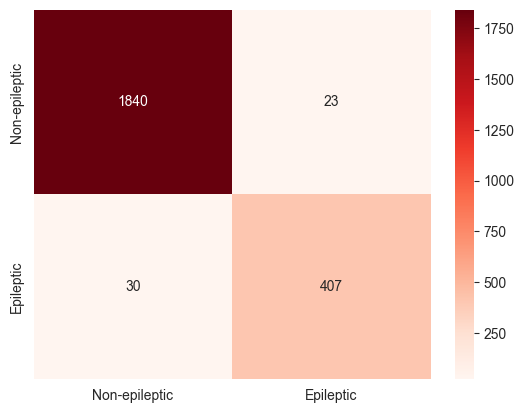

In [34]:
cm = confusion_matrix(y_test, Y_hat_test)
fig, ax = plt.subplots()
sns.heatmap(cm, ax = ax, annot = True, cmap = plt.cm.Reds, fmt = 'd', xticklabels = ['Non-epileptic', 'Epileptic'], yticklabels = ['Non-epileptic', 'Epileptic'])

## ❓ PMML creation: example with Neural Network

### ❗Needs to downgrade SKLEARN to 1.2.2❗

In [36]:
from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline
from sklearn.neural_network import MLPClassifier
import subprocess
import warnings
warnings.filterwarnings('ignore')

# starting Openscoring server
subprocess.Popen(["java", "-jar", "Server/lib/openscoring-server-executable-2.1.1.jar"])

# setting grid
grid_pmml = {
            'hidden_layer_sizes': (100, 100),
            'activation': 'tanh',
            'solver': 'sgd',
            'alpha': 0.0001,
            'max_iter': 1000
        }

# preparing
pipeline = PMMLPipeline([("classifier", MLPClassifier(**grid_pmml))])

# training
pipeline.fit(X, y)

# creating .pmml
sklearn2pmml(pipeline, "Server\\pmml\\NeuralNetwork.pmml")

# starting Openscoring with .pmml
subprocess.run(["powershell", "java -cp Server\\lib\\openscoring-client-executable-2.1.1.jar org.openscoring.client.Deployer --model http://localhost:8080/openscoring/model/NeuralNetwork --file Server\\pmml\\NeuralNetwork.pmml"], shell=True)       

CompletedProcess(args=['powershell', 'java -cp Server\\lib\\openscoring-client-executable-2.1.1.jar org.openscoring.client.Deployer --model http://localhost:8080/openscoring/model/NeuralNetwork --file Server\\pmml\\NeuralNetwork.pmml'], returncode=0)